In [2]:
from google.colab import files
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail.xlsx


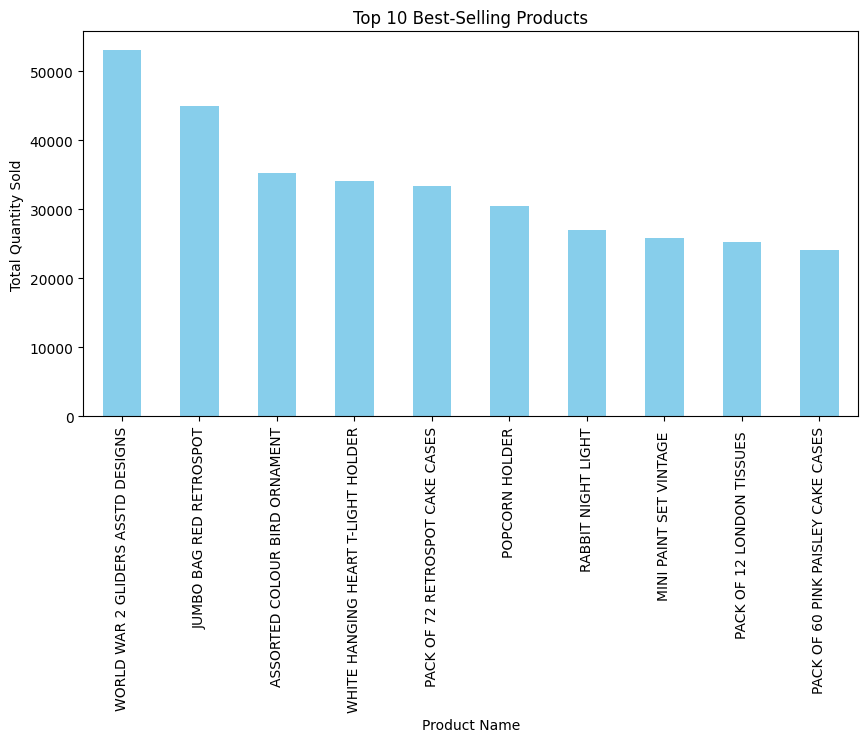

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Online Retail.xlsx")
df = df.dropna(subset=['CustomerID'])
df = df.drop_duplicates()

top_products = df.groupby("Description")["Quantity"].sum()
top_products = top_products.sort_values(ascending=False)

top_10 = top_products.head(10)

plt.figure(figsize=(10,5))
top_10.plot(kind='bar', color='skyblue')
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=90)
plt.show()


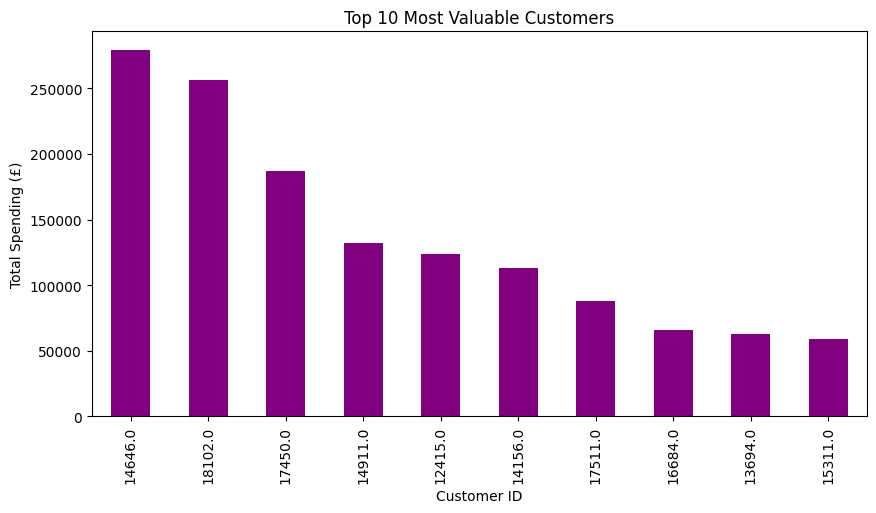

In [5]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False)
top_10_customers = top_customers.head(10)

plt.figure(figsize=(10,5))
top_10_customers.plot(kind='bar', color='purple')
plt.xlabel("Customer ID")
plt.ylabel("Total Spending (£)")
plt.title("Top 10 Most Valuable Customers")
plt.show()


<ipython-input-6-a84860556a8f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')["TotalPrice"].sum()


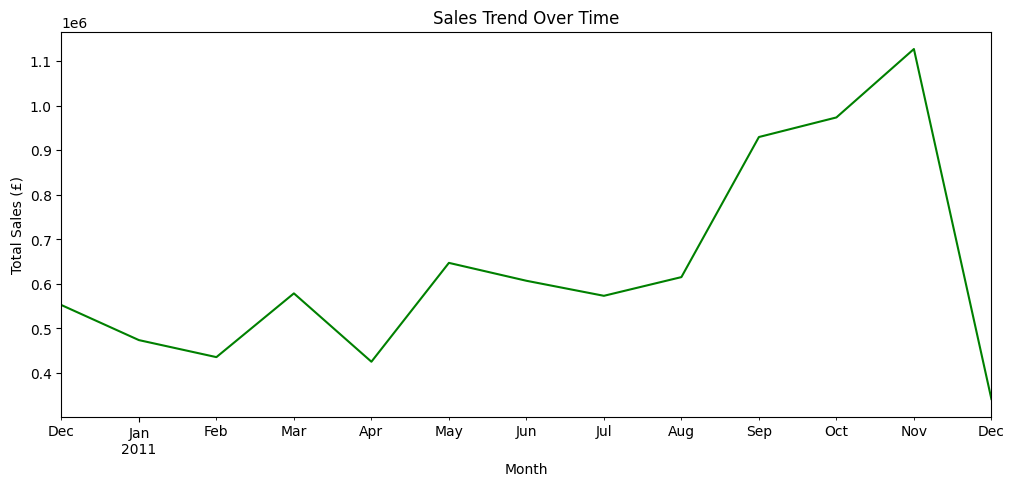

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index("InvoiceDate", inplace=True)
monthly_sales = df.resample('M')["TotalPrice"].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(color='green')
plt.xlabel("Month")
plt.ylabel("Total Sales (£)")
plt.title("Sales Trend Over Time")
plt.show()


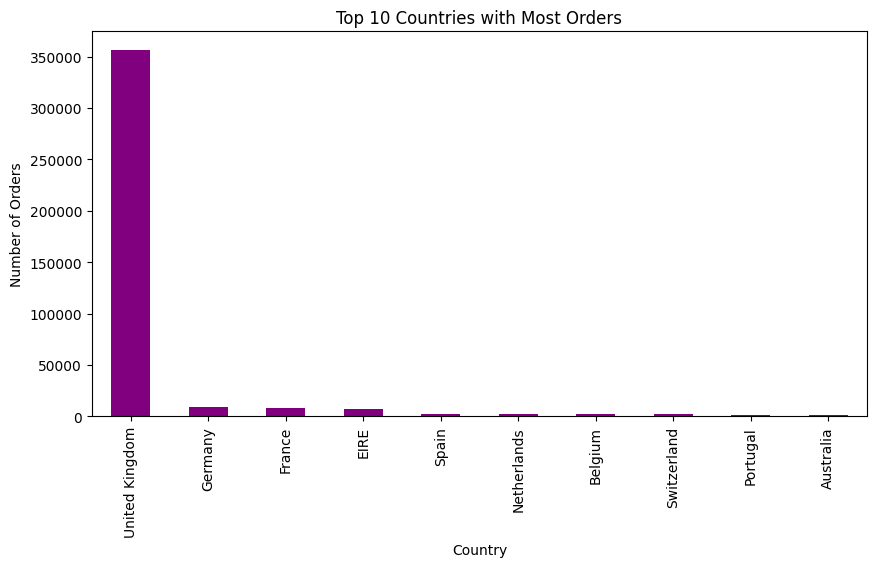

In [7]:
country_sales = df.groupby("Country")["InvoiceNo"].count().sort_values(ascending=False)
top_10_countries = country_sales.head(10)

plt.figure(figsize=(10,5))
top_10_countries.plot(kind='bar', color='purple')
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.title("Top 10 Countries with Most Orders")
plt.show()
